In [1]:
def ABCindeks(drevo): #izracun ABC indeksa za neko drevo, len(drevo[u]) ti da dolzino seznama sosedov za vozlisce u torej je to stopnja vozlisca u
    produkt = 1
    for u in drevo:
        for v in drevo[u]:
            produkt = produkt * (len(drevo[u]) + len(drevo[v]) - 2) / (len(drevo[u]) * len(drevo[v]))
    return sqrt(produkt)

#ABCindeks(G)

In [2]:
def minABCindeks(n): #izracun najmanjsega ABC indeksa za vsa drevesa z n vozlisci, vrne tudi seznam dreves, ki imajo ta najmanjsi indeks
    min_indeks = None
    for dr in graphs.trees(n):
        if min_indeks == None:
            min_indeks = ABCindeks(dr)
            drevesa_z_min_ind = [dr]
        else:
            if ABCindeks(dr) < min_indeks:
                min_indeks = ABCindeks(dr)
                drevesa_z_min_ind = [dr]
            elif ABCindeks(dr) == min_indeks:
                drevesa_z_min_ind.append(dr)
            else:
                continue
    return min_indeks , drevesa_z_min_ind

#minABCindeks(9)

In [4]:
rezultati = []
for n in range(17) : #range naredi seznam od 0 do 18, midva hoceva grafe z vozlisci od 1 do 19 zato je spodaj n+1
        rez = [vrednost, seznam_grafov] = minABCindeks(n+1)
        rezultati.append(rez)
rezultati #rabu je okol 10 min (za 19)

[(1, [Graph on 1 vertex]),
 (0, [Graph on 2 vertices]),
 (1/4, [Graph on 3 vertices]),
 (1/8, [Graph on 4 vertices]),
 (1/16, [Graph on 5 vertices]),
 (1/32, [Graph on 6 vertices]),
 (1/64, [Graph on 7 vertices, Graph on 7 vertices]),
 (1/128, [Graph on 8 vertices, Graph on 8 vertices]),
 (1/256,
  [Graph on 9 vertices,
   Graph on 9 vertices,
   Graph on 9 vertices,
   Graph on 9 vertices]),
 (1/576, [Graph on 10 vertices]),
 (1/1152, [Graph on 11 vertices]),
 (5/12288, [Graph on 12 vertices]),
 (1/5184, [Graph on 13 vertices]),
 (3/32768, [Graph on 14 vertices]),
 (25/589824, [Graph on 15 vertices]),
 (25/1179648, [Graph on 16 vertices, Graph on 16 vertices]),
 (5/524288, [Graph on 17 vertices])]

In [9]:
# recimo da naju zanimajo premeri teh grafov, uporabiva lahko metodo diameter za objekte graphs
premeri = []
for (vrednost, seznam_grafov) in rezultati:
    pr = []
    for graf in seznam_grafov:
        pr.append(graf.diameter())
    premeri.append(pr)
premeri

[[0],
 [1],
 [2],
 [3],
 [4],
 [5],
 [6, 4],
 [7, 5],
 [8, 6, 6, 4],
 [5],
 [6],
 [5],
 [6],
 [5],
 [6],
 [7, 6],
 [6],
 [6],
 [6]]

drevesa z minimalnim ABC indeksom s št. vozlišč 7


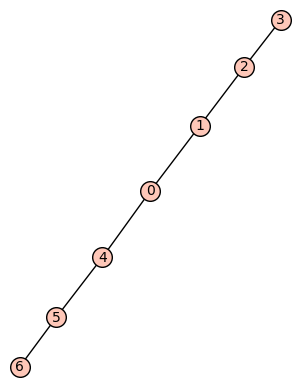

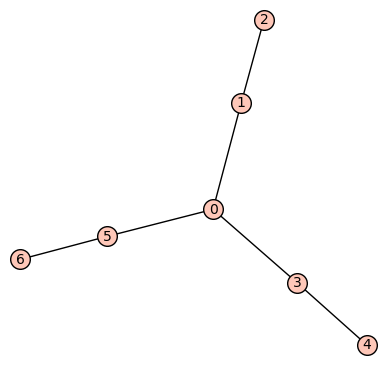

drevesa z minimalnim ABC indeksom s št. vozlišč 8


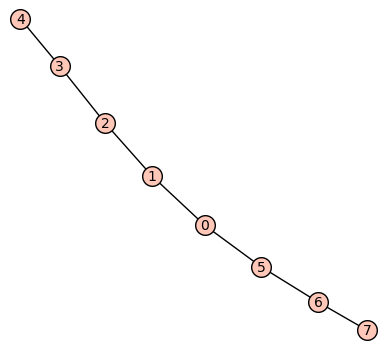

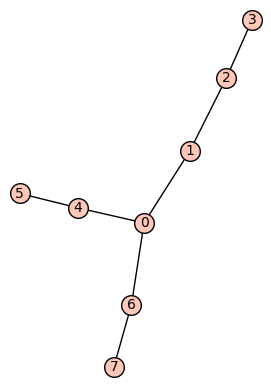

drevesa z minimalnim ABC indeksom s št. vozlišč 9


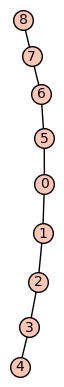

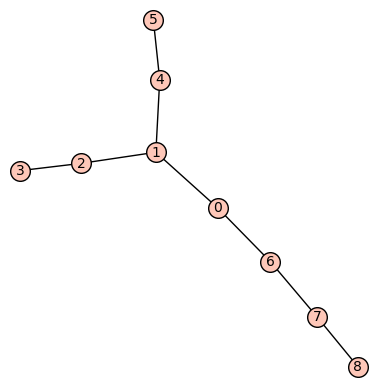

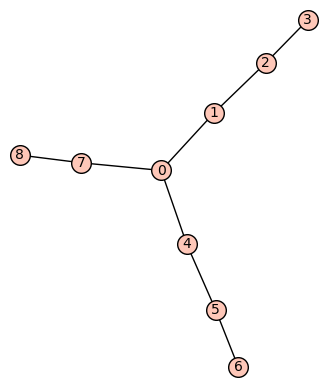

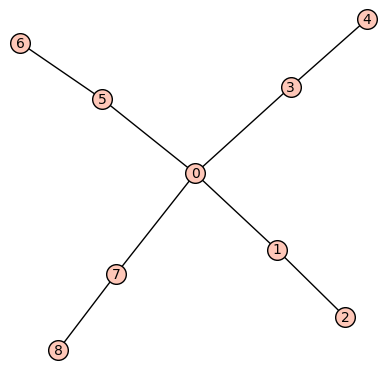

drevesa z minimalnim ABC indeksom s št. vozlišč 16


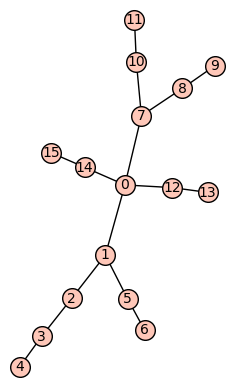

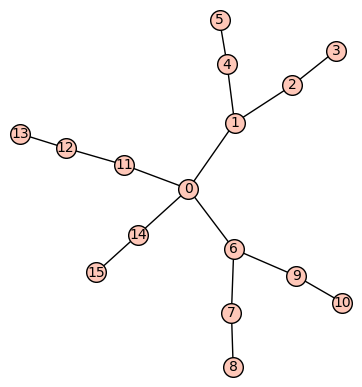

In [10]:
#ce naju zanima unikatnost dreves, lahko v seznamu dreves v rezultatih vidiva ali je samo eno drevo z min indeksom ali jih je vec, ce jih je vec si jih je morda smiselno narisati
n=1
for (vrednost, seznam_grafov) in rezultati:
    if len(seznam_grafov) >= 2:
        print "drevesa z minimalnim ABC indeksom s št. vozlišč {}".format(n)
        for graf in seznam_grafov:
            show(graf)
    n += 1

In [11]:
#ce naju zanimajo dolzine najdaljsih poti v grafih 
def najdaljsa_pot(graf):
    najdaljsa = 0
    for u in graf:            #gremo cez vsa vozlisca v grafu
        if len(graf[u]) == 2:  #ce imajo stopnjo = 2 nadaljujemo
            soseda = graf[u]
            s = u #dolocimo sedanje vozlisce
            dolzina = 3        #sedaj imamo pot dolzine vsaj 3 - sedanje vozlišče in njegova soseda
            if len(graf[soseda[0]]) != 2: #preverimo ali ima vsaj eno od sosednjih vozlisc stopnjo neenako 2 (da ne zacnemo steti sredi poti)
                p = soseda[0] #dolocimo prejsnje vozlisce (tisto s stopnjo neenako 2)
                n = soseda[1] # in naslednje vozlisce
            elif len(graf[soseda[1]]) != 2:
                p = soseda[1]
                n = soseda[0]
            else: #ce imata obe sosednji vozlisci stopnjo 2 smo na sredi poti in tega primera ne preverjamo
                continue
            while len(graf[n]) == 2: #z while zanko se bomo sedaj premikali po poti dokler ne naletimo na vozlisce ki nima stopnje = 2
                dolzina += 1 #za vsako naslednje vozlisce povecamo dolzino
                p = s #premanemo vozlisca: novo prejsnje je staro sedanje,
                s = n #novo sedanje je staro naslednje
                if graf[s][0] != p: #novo naslednje je tisto od sosedov novega sedanjega ki ni enako novemu prejsnjemu
                    n = graf[s][0]
                else:
                    n = graf[s][1]
        else:
            continue
        if dolzina > najdaljsa: #ce smo nasli novo najdaljso pot jo shranimo
            najdaljsa = dolzina
    return najdaljsa

najdaljse_poti = []
for (vrednost, seznam_grafov) in rezultati:
    dol = []
    for graf in seznam_grafov:
        dol.append(najdaljsa_pot(graf))
    najdaljse_poti.append(dol)

najdaljse_poti

[[0],
 [0],
 [3],
 [4],
 [5],
 [6],
 [7, 3],
 [8, 4],
 [9, 5, 4, 3],
 [3],
 [4],
 [3],
 [3],
 [3],
 [3],
 [4, 4],
 [3],
 [3],
 [3]]

In [12]:
### vozilisca s stopnjo >=3
povezave = []
for (vrednost, seznam_grafov) in rezultati:
    for graf in seznam_grafov:
        indeksi = []
        for u in graf:
            if len(graf[u]) >=3:
                indeksi.append(1)
            else:
                indeksi.append(0)
        povezave.append((graf.order(),indeksi, 'sum={}'.format(sum(indeksi)),'abc_indeks={}'.format(vrednost)))
        indeksi = []
povezave

[(1, [0], 'sum=0', 'abc_indeks=1'),
 (2, [0, 0], 'sum=0', 'abc_indeks=0'),
 (3, [0, 0, 0], 'sum=0', 'abc_indeks=1/4'),
 (4, [0, 0, 0, 0], 'sum=0', 'abc_indeks=1/8'),
 (5, [0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/16'),
 (6, [0, 0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/32'),
 (7, [0, 0, 0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/64'),
 (7, [1, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/64'),
 (8, [0, 0, 0, 0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/128'),
 (8, [1, 0, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/128'),
 (9, [0, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=0', 'abc_indeks=1/256'),
 (9, [0, 1, 0, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/256'),
 (9, [1, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/256'),
 (9, [1, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=1', 'abc_indeks=1/256'),
 (10, [1, 1, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=2', 'abc_indeks=1/576'),
 (11, [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=2', 'abc_indeks=1/1152'),
 (12, [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'sum=2', 'abc_indeks=5/12288'),
 (13, [1, 1, 0, 0, 0,

In [14]:
### koliko je vozlisc s samo eno povezavo 
stevilo_listov = []
for (vrednost, seznam_grafov) in rezultati:
    for graf in seznam_grafov:
        listi = 0
        for u in graf:
            if len(graf[u]) ==1 :
                listi += 1
        stevilo_listov.append((graf.order(),listi))
        listi = 0
stevilo_listov

[(1, 0),
 (2, 2),
 (3, 2),
 (4, 2),
 (5, 2),
 (6, 2),
 (7, 2),
 (7, 3),
 (8, 2),
 (8, 3),
 (9, 2),
 (9, 3),
 (9, 3),
 (9, 4),
 (10, 4),
 (11, 4),
 (12, 5),
 (13, 5),
 (14, 6),
 (15, 6),
 (16, 6),
 (16, 6),
 (17, 7),
 (18, 7),
 (19, 8)]

Graf s 1 vozlisci


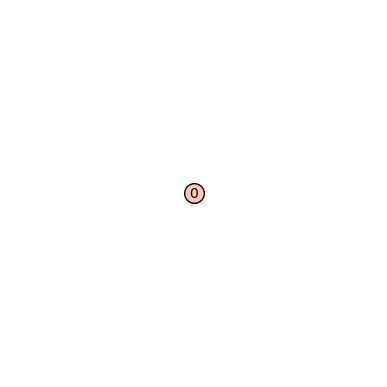

Graf s 2 vozlisci


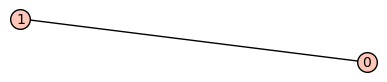

Graf s 3 vozlisci


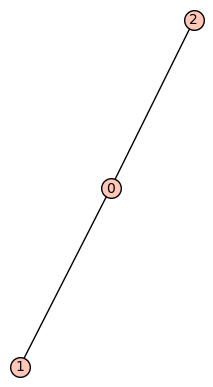

Graf s 4 vozlisci


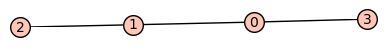

Graf s 5 vozlisci


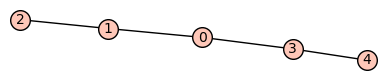

Graf s 6 vozlisci


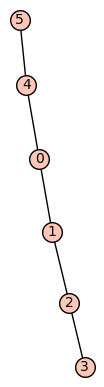

Graf s 7 vozlisci


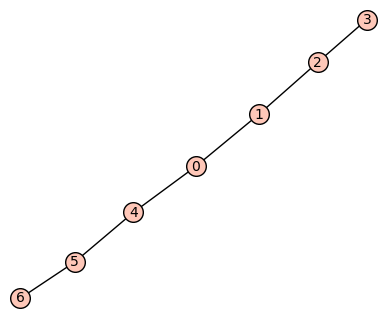

Graf s 7 vozlisci


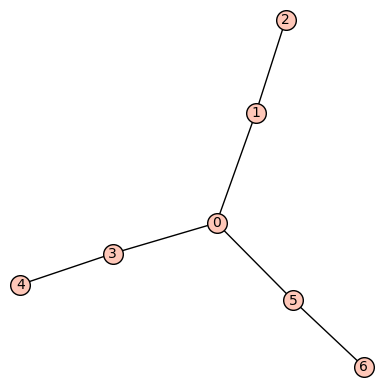

Graf s 8 vozlisci


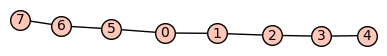

Graf s 8 vozlisci


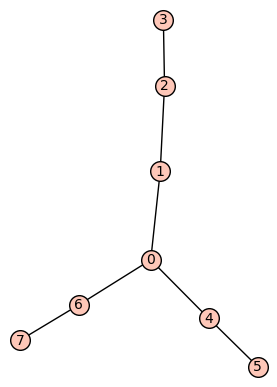

Graf s 9 vozlisci


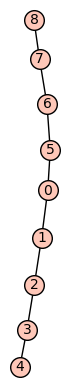

Graf s 9 vozlisci


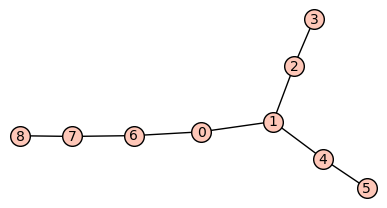

Graf s 9 vozlisci


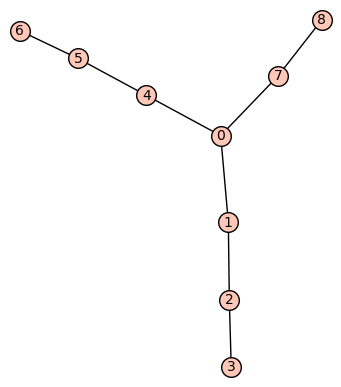

Graf s 9 vozlisci


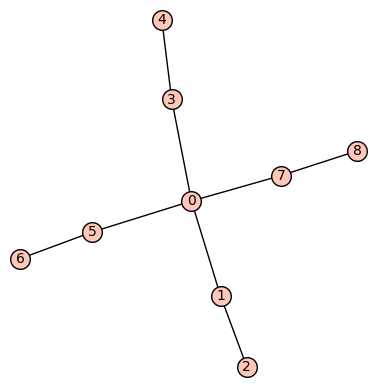

Graf s 10 vozlisci


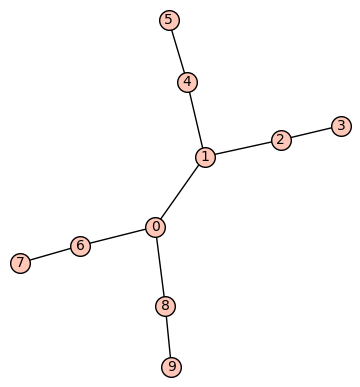

Graf s 11 vozlisci


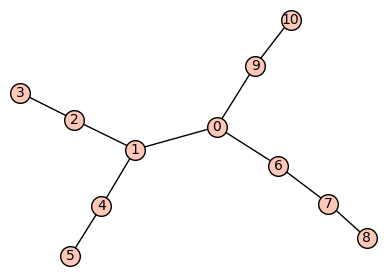

Graf s 12 vozlisci


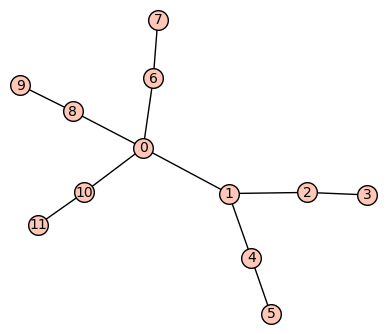

Graf s 13 vozlisci


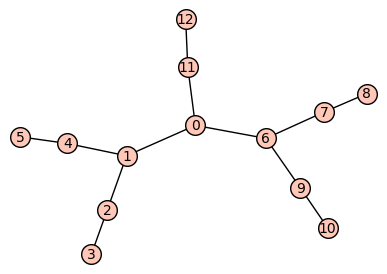

Graf s 14 vozlisci


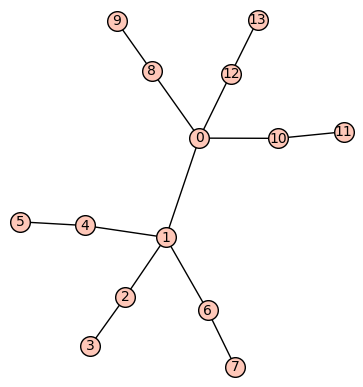

Graf s 15 vozlisci


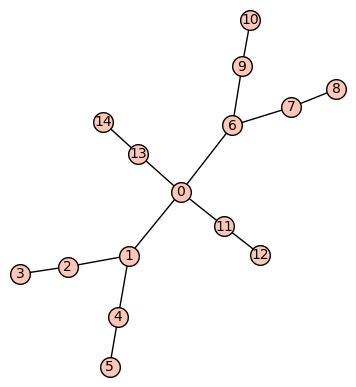

Graf s 16 vozlisci


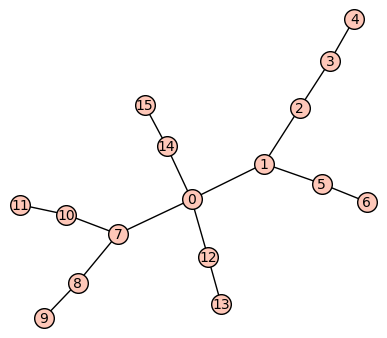

Graf s 16 vozlisci


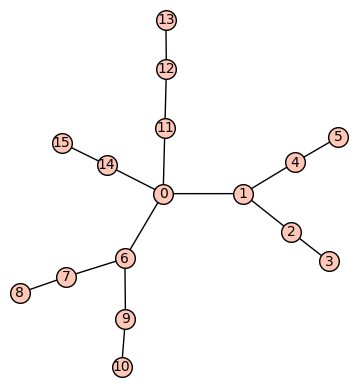

Graf s 17 vozlisci


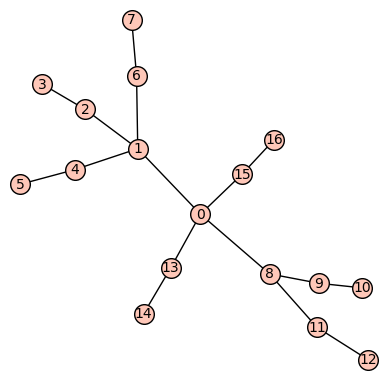

Graf s 18 vozlisci


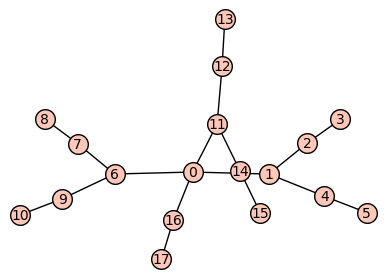

Graf s 19 vozlisci


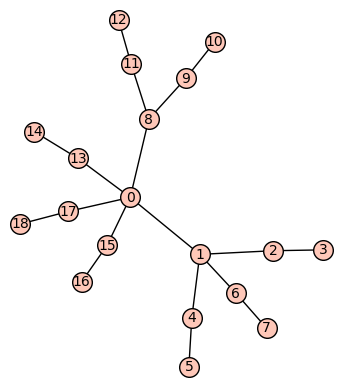

In [15]:

for (vrednost, seznam_grafov) in rezultati:
        for graf in seznam_grafov:
            print "Graf s {} vozlisci".format(graf.order())
            show(graf)


In [10]:
rezultati[16][1][0].vertices().index(3)

3

In [21]:
def graph_into_matrix(graf):
    sez = graf.vertices()
    stevilo = len(sez)
    mat = []
    for u in graf:
        vrstica = [0] * stevilo
        for v in graf[u]:
            vrstica[sez.index(v)] = 1
        mat.append(vrstica)
    return mat

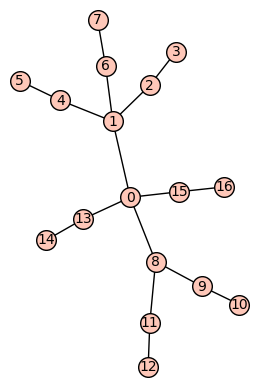

In [15]:
show(G)

In [23]:
G = rezultati[16][1][0]
graph_into_matrix(G)

[[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [30]:
def matrix_into_graph(matrix):
    slovar={}
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == 1:
                if i in slovar:
                    slovar[i].append(j)
                else:
                    slovar[i] = [j]
    return  Graph(slovar)

In [13]:
### stopnja vsakega vozlišča 
povezave_indeksi = []
for (vrednost, seznam_grafov) in rezultati:
    for graf in seznam_grafov:
        indeksi = []
        for u in graf:
            indeksi.append(len(graf[u]))
        povezave_indeksi.append((graf.order(),indeksi))
        indeksi = []
povezave_indeksi

[(1, [0]),
 (2, [1, 1]),
 (3, [2, 1, 1]),
 (4, [2, 2, 1, 1]),
 (5, [2, 2, 1, 2, 1]),
 (6, [2, 2, 2, 1, 2, 1]),
 (7, [2, 2, 2, 1, 2, 2, 1]),
 (7, [3, 2, 1, 2, 1, 2, 1]),
 (8, [2, 2, 2, 2, 1, 2, 2, 1]),
 (8, [3, 2, 2, 1, 2, 1, 2, 1]),
 (9, [2, 2, 2, 2, 1, 2, 2, 2, 1]),
 (9, [2, 3, 2, 1, 2, 1, 2, 2, 1]),
 (9, [3, 2, 2, 1, 2, 2, 1, 2, 1]),
 (9, [4, 2, 1, 2, 1, 2, 1, 2, 1]),
 (10, [3, 3, 2, 1, 2, 1, 2, 1, 2, 1]),
 (11, [3, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1]),
 (12, [4, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]),
 (13, [3, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1]),
 (14, [4, 4, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1]),
 (15, [4, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1]),
 (16, [4, 3, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1]),
 (16, [4, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 2, 1, 2, 1]),
 (17, [4, 4, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1]),
 (18, [4, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1]),
 (19, [5, 4, 2, 1, 2, 1, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1])]

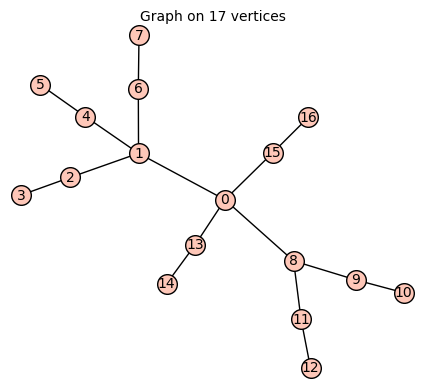

In [31]:
matrix_into_graph(graph_into_matrix(G))

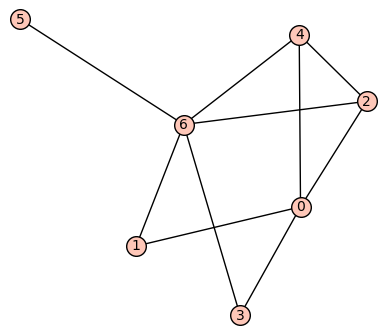

[0, 1, 2, 3, 4, 5, 6]

In [20]:
 H=Graph({0:[1,2,3, 4], 4:[0,2, 6], 6:[1,2,3,4,5]})
show(H)
H.vertices()

In [0]:
### pri algoritmu bi zelel ohranjati strukturo